In [1]:
import netCDF4
url=r"C:\Users\sathishm\OneDrive - Qualcomm\Desktop\tmmn_2019.nc"
dataset = netCDF4.Dataset(url)
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    geospatial_bounds_crs: EPSG:4326
    Conventions: CF-1.6
    geospatial_bounds: POLYGON((-124.7666666333333 49.400000000000000, -124.7666666333333 25.066666666666666, -67.058333300000015 25.066666666666666, -67.058333300000015 49.400000000000000, -124.7666666333333 49.400000000000000))
    geospatial_lat_min: 25.066666666666666
    geospatial_lat_max: 49.40000000000000
    geospatial_lon_min: -124.7666666333333
    geospatial_lon_max: -67.058333300000015
    geospatial_lon_resolution: 0.041666666666666
    geospatial_lat_resolution: 0.041666666666666
    geospatial_lat_units: decimal_degrees north
    geospatial_lon_units: decimal_degrees east
    coordinate_system: EPSG:4326
    author: John Abatzoglou - University of Idaho, jabatzoglou@uidaho.edu
    date: 29 January 2020
    note1: The projection information for this file is: GCS WGS 1984.
    note2: Citation: Abatzoglou, J.T., 2013, Developmen

In [4]:
print(dataset.variables.keys())

dict_keys(['lon', 'lat', 'day', 'crs', 'air_temperature'])


In [15]:
print(dataset.variables['air_temperature'])

<class 'netCDF4._netCDF4.Variable'>
uint16 air_temperature(day, lat, lon)
    _FillValue: 32767
    units: K
    description: Daily Minimum Temperature
    long_name: tmmn
    standard_name: tmmn
    missing_value: 32767
    dimensions: lon lat time
    grid_mapping: crs
    coordinate_system: WGS84,EPSG:4326
    scale_factor: 0.1
    add_offset: 210.0
    coordinates: lon lat
    _Unsigned: true
unlimited dimensions: 
current shape = (365, 585, 1386)
filling on


In [6]:
for d in dataset.dimensions.items():
    print(d)

('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 1386)
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 585)
('day', <class 'netCDF4._netCDF4.Dimension'>: name = 'day', size = 365)
('crs', <class 'netCDF4._netCDF4.Dimension'>: name = 'crs', size = 1)


In [23]:
max_air_temp = dataset.variables['air_temperature']

In [39]:
temp = max_air_temp[322].data

In [43]:
display(temp.shape)

(585, 1386)

In [54]:
lon = dataset.variables['lon'][:].data

In [55]:
lat = dataset.variables['lat'][:].data

In [83]:
import numpy as np
SD_county_lats = np.where((lat<33.6) & (lat>32.4))
SD_county_lons = np.where((lon<-116.0) & (lon>-118))

In [139]:
SD_county_max_air_temp = max_air_temp[180][SD_county_lats[0][0]:SD_county_lats[0][-1],SD_county_lons[0][0]:SD_county_lons[0][-1]]

In [140]:
#Valid entries are only this much
SD_county_max_air_temp[~SD_county_max_air_temp.mask].size

890

In [141]:
SD_county_max_air_temp.shape

(28, 47)

In [144]:
type(max_air_temp[0])

numpy.ma.core.MaskedArray

In [145]:
max_air_temp.shape

(365, 585, 1386)

In [153]:
max_air_temp_mean = []
for i in range(max_air_temp.shape[0]):
    SD_county_max_air_temp = max_air_temp[i][SD_county_lats[0][0]:SD_county_lats[0][-1],SD_county_lons[0][0]:SD_county_lons[0][-1]]
#     print ("For ", i , "valid entries available are", SD_county_max_air_temp[~SD_county_max_air_temp.mask].size)
#     print ("Mean is", SD_county_max_air_temp.mean())
    max_air_temp_mean.append(SD_county_max_air_temp.mean())

In [154]:
max_air_temp_mean

[273.1852808988764,
 272.5004494382023,
 274.51157303370786,
 274.72179775280904,
 278.5385393258427,
 276.91842696629215,
 277.3712359550562,
 279.3037078651685,
 278.2925842696629,
 278.17719101123595,
 278.17775280898877,
 276.8922471910112,
 276.6788764044944,
 281.0458426966292,
 280.9765168539326,
 282.6738202247191,
 282.7474157303371,
 281.1992134831461,
 281.55842696629213,
 280.7851685393258,
 276.49640449438203,
 275.81393258426965,
 277.0942696629213,
 279.4404494382023,
 279.56404494382025,
 281.4628089887641,
 280.83786516853934,
 281.20775280898874,
 281.93595505617975,
 281.0265168539326,
 279.21426966292137,
 279.2723595505618,
 280.6442696629213,
 279.7685393258427,
 280.22842696629215,
 276.57831460674157,
 273.1413483146068,
 273.6014606741573,
 273.9232584269663,
 275.73505617977526,
 274.44573033707866,
 273.3210112359551,
 275.98258426966294,
 280.74685393258426,
 280.34067415730334,
 279.38258426966297,
 278.42157303370783,
 276.58033707865167,
 272.798539325842

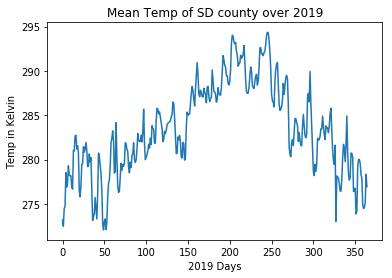

In [156]:
import matplotlib.pyplot as plt

plt.plot(range(max_air_temp.shape[0]), max_air_temp_mean)
plt.xlabel("2019 Days")
plt.ylabel("Temp in Kelvin")
plt.title("Mean Temp of SD county over 2019")
plt.show()

In [159]:
np.where(~SD_county_max_air_temp.mask)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
         5, 

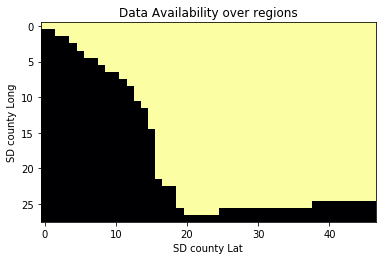

In [175]:
plt.imshow(~SD_county_max_air_temp.mask, cmap='inferno', interpolation='nearest')
plt.xlabel("SD county Lat")
plt.ylabel("SD county Long")
plt.title("Data Availability over regions")
plt.show()

In [167]:
SD_county_max_air_temp.mask[15]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])